In [1]:
# Lets import necessary libraries
import pandas as pd
import numpy as np
import statistics as sts
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge,Lasso


In [2]:
#Importing data
data=pd.read_csv('C:/Users/Administrator/Desktop/Python/ML/Assignments/Assign1/Assignment1_PGD B7/Assignment1_PGD B7/Train.csv')

In [3]:
#Lets observe top 5 rows of our datset
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Lets get some statistical information about the data
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
# Shape of data
data.shape

(8523, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


- As we an observe from the above that column "Item_Identifier" and "Outlet_Size" have some missing values.We will have to deal with the same and with categorical variables.

# Lets do some plotting to get some infrences about the data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [38]:
# As we can observe that "Item_Fat_Content" is having same values with unique names,therefor equalizing lower and equalizing values that are similar.
data['Item_Fat_Content']=data['Item_Fat_Content'].str.lower()
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('lf','low fat').replace('reg','regular')
data['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

Text(0, 0.5, 'Count of Item Type based on Fat Content')

<Figure size 576x432 with 0 Axes>

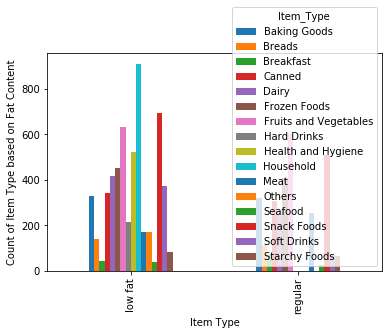

In [62]:
plt.figure(figsize=(8,6))
pd.crosstab(data['Item_Fat_Content'],data['Item_Type']).plot(kind='bar')
plt.xlabel('Item Type')
plt.ylabel('Count of Item Type based on Fat Content')

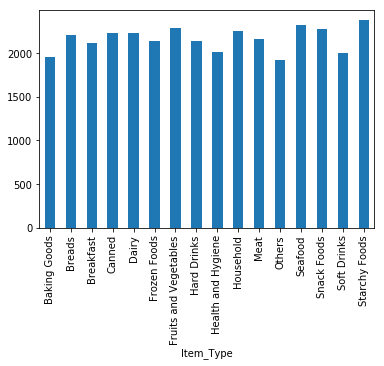

In [78]:
data.groupby('Item_Type')['Item_MRP'].mean().plot(kind='bar')

- We can observe that approximately every Item have same "MRP".

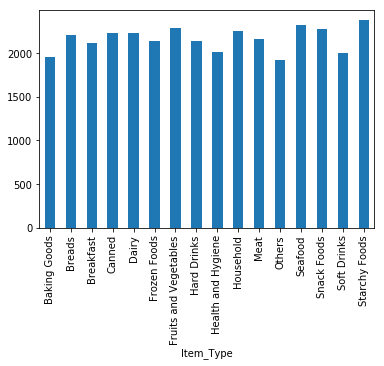

In [11]:
data.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot(kind='bar')

- We can observe that approximately every Item have same "Item_Outlet_Sales".

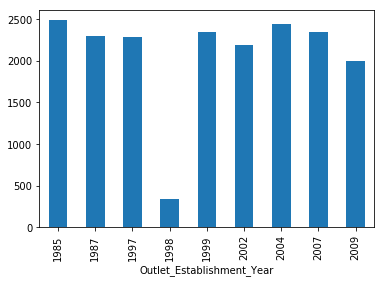

In [1234]:
data[['Outlet_Establishment_Year','Item_Outlet_Sales']].groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot(kind='bar')

- We can observe the average sales for each year and approximately it's been the same every year.

# Missing Value treatment

### Method 1 (Finding mean and imputing the same for missing values)->> 

In [80]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Treatment of Item_Weight

In [81]:
#Creating a new dataframe which is just a copy of our original dataframe
data1=data.copy()

In [82]:
# Finding mean value of Item weight for each item type
mean_weight=data1.groupby('Item_Type')['Item_Weight'].mean().reset_index()

In [83]:
# Now as we have found the mean of different item type,the next task is to impute the same for missing values in our data
a=data1[data1['Item_Weight'].isnull()]

In [84]:
a[a['Item_Type']=="Baking Goods"]=a[a['Item_Type']=="Baking Goods"].fillna(mean_weight['Item_Weight'][0])
a[a['Item_Type']=="Breads"]=a[a['Item_Type']=="Breads"].fillna(mean_weight['Item_Weight'][1])
a[a['Item_Type']=="Breakfast"]=a[a['Item_Type']=="Breakfast"].fillna(mean_weight['Item_Weight'][2])
a[a['Item_Type']=="Canned"]=a[a['Item_Type']=="Canned"].fillna(mean_weight['Item_Weight'][3])
a[a['Item_Type']=="Dairy"]=a[a['Item_Type']=="Dairy"].fillna(mean_weight['Item_Weight'][4])
a[a['Item_Type']=="Frozen Foods"]=a[a['Item_Type']=="Frozen Foods"].fillna(mean_weight['Item_Weight'][5])
a[a['Item_Type']=="Fruits and Vegetables"]=a[a['Item_Type']=="Fruits and Vegetables"].fillna(mean_weight['Item_Weight'][6])
a[a['Item_Type']=="Hard Drinks"]=a[a['Item_Type']=="Hard Drinks"].fillna(mean_weight['Item_Weight'][7])
a[a['Item_Type']=="Health and Hygiene"]=a[a['Item_Type']=="Health and Hygiene"].fillna(mean_weight['Item_Weight'][8])
a[a['Item_Type']=="Household"]=a[a['Item_Type']=="Household"].fillna(mean_weight['Item_Weight'][9])
a[a['Item_Type']=="Meat"]=a[a['Item_Type']=="Meat"].fillna(mean_weight['Item_Weight'][10])
a[a['Item_Type']=="Others"]=a[a['Item_Type']=="Others"].fillna(mean_weight['Item_Weight'][11])
a[a['Item_Type']=="Seafood"]=a[a['Item_Type']=="Seafood"].fillna(mean_weight['Item_Weight'][12])
a[a['Item_Type']=="Snack Foods"]=a[a['Item_Type']=="Snack Foods"].fillna(mean_weight['Item_Weight'][13])
a[a['Item_Type']=="Soft Drinks"]=a[a['Item_Type']=="Soft Drinks"].fillna(mean_weight['Item_Weight'][14])
a[a['Item_Type']=="Starchy Foods"]=a[a['Item_Type']=="Starchy Foods"].fillna(mean_weight['Item_Weight'][15])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [85]:
# Imputing the nan values with the mean
data1['Item_Weight']=data1['Item_Weight'].fillna(a['Item_Weight'])

In [86]:
data1['Item_Weight'].isnull().sum()

0

- Treatment of Outlet_Size

In [87]:
mode_outlet=sts.mode(data['Outlet_Size'])
data1['Outlet_Size']=data1['Outlet_Size'].fillna(mode_outlet)

In [88]:
data1['Outlet_Size'].isnull().sum()

0

### Method 2 (Applying bfill and ffill)->> 

In [89]:
data2=data.copy()

In [90]:
ffill_df=data2.ffill()

In [91]:
bfill_df=data2.bfill()

# Treating Outliers

### 1. Boxplot for Item Visibilty column

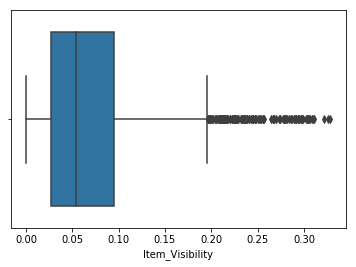

In [97]:
sns.boxplot(data1['Item_Visibility'])

- From above we can analyze that 'Item_Visibility' contains many outliers and should be treated as well.

In [127]:
Q1 = np.quantile(data1['Item_Visibility'],0.25)
Q3 = np.quantile(data1['Item_Visibility'],0.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)

#Values that are outliers provided we have initialised head in the same to just have a look at them.
data1[(data1['Item_Visibility']>upper_limit)\
| (data1['Item_Visibility']<lower_limit)].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,FDS02,13.426069,regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
83,NCL18,13.384736,low fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408
108,DRE60,11.847460,low fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
174,FDI32,17.700000,low fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Medium,Tier 3,Grocery Store,345.5502
334,FDC41,12.867061,low fat,0.204700,Frozen Foods,76.8670,OUT019,1985,Small,Tier 1,Grocery Store,229.7010


In [141]:
#Number of outliers present in 'Item Viibility' column
print('Number of outliers in Item Visibility column :',len(data1[(data1['Item_Visibility']>upper_limit)\
| (data1['Item_Visibility']<lower_limit)]))

#Total number of rows present in our data
print('Total number of rows present in our data :',len(data1['Item_Visibility']))

#Percentage of outliers present in Item Visibility column
print('Percentage of outliers present in Item Visibility column :',((len(data1[(data1['Item_Visibility']>upper_limit)\
| (data1['Item_Visibility']<lower_limit)])) / (len(data1['Item_Visibility']))) * 100)

Number of outliers in Item Visibility column : 144
Total number of rows present in our data : 8523
Percentage of outliers present in Item Visibility column : 1.689545934530095


- Capping and Flooring all values of Item Visibility that are our outliers.

In [153]:
# Capping and Flooring all values of Item Visibility that are our outliers.
data1['Item_Visibility'] = data1['Item_Visibility'].clip_upper(upper_limit)
data1['Item_Visibility'] = data1['Item_Visibility'].clip_lower(lower_limit)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  


- Lets observe if the outliers have been treated well with the help of boxplot

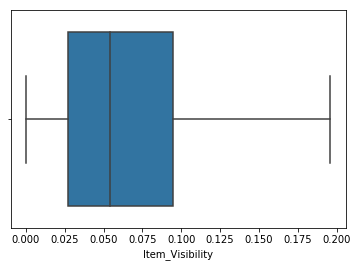

In [155]:
sns.boxplot(data1['Item_Visibility'])

- Therefore outliers that were present in Item Visibility column have been treated.

### 2. Boxplot for Item MRP column

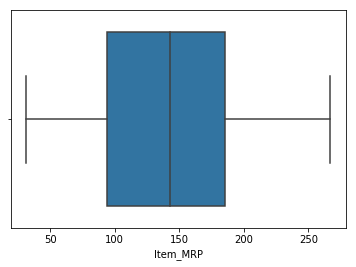

In [156]:
sns.boxplot(data1['Item_MRP'])

- From above we can observe that there are no outliers present in Item MRP column.

### 3. Boxplot for Item Weight column

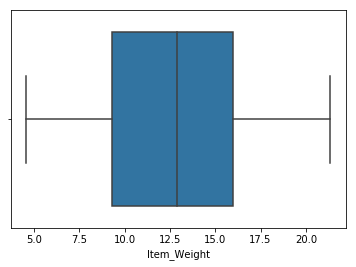

In [157]:
sns.boxplot(data1['Item_Weight'])

- From above we can observe that there are no outliers present in Item Weight column.

# Treating categorical variables

- We will be applying Label Encoding and One Hot Encoding both to observe the impact of both the techniques on our data.
For this we will take two copy of our dataframe.

In [665]:
#Since we don't require Item_Identifier and Outlet_Identifier so we are dropping the same.
data1.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [1018]:
data1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,low fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,low fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,low fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


### Label Encoding

In [1024]:
#Creating a copy of our original dataframe as label.
label_df = data1.copy()

In [1025]:
x=LabelEncoder()
label_df['Item_Fat_Content']=x.fit_transform(label_df['Item_Fat_Content'])
label_df['Item_Type']=x.fit_transform(label_df['Item_Type'])
label_df['Outlet_Size']=x.fit_transform(label_df['Outlet_Size'])
label_df['Outlet_Location_Type']=x.fit_transform(label_df['Outlet_Location_Type'])
label_df['Outlet_Type']=x.fit_transform(label_df['Outlet_Type'])

- Lets observe our dataframe "label_df"

In [1020]:
label_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,2.230014,0,0.016047,4,5.520697,1999,1,0,1,3735.1380
1,1.778336,1,0.019278,14,3.876794,2009,1,2,2,443.4228
2,2.862201,0,0.016760,10,4.953133,1999,1,0,1,2097.2700
3,2.954910,1,0.000000,6,5.204529,1998,1,2,0,732.3800
4,2.189416,0,0.000000,9,3.986414,1987,0,2,1,994.7052


### One Hot Encoding

In [1207]:
#Creating a copy of our original dataframe as label.
onehot_df = data1.copy()

In [1208]:
onehot_df = pd.get_dummies(onehot_df)

- Lets observe our dataframe "onehot_df"

In [672]:
onehot_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


# Transformation

### Checking Skewness on dataframe label_df

In [673]:
label_df.skew()

Item_Weight                  0.089537
Item_Fat_Content             0.616705
Item_Visibility              0.813980
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

- Plotting KDE plot of Item_Visibility

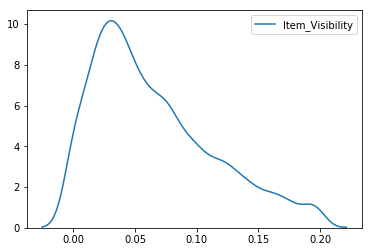

In [674]:
sns.kdeplot(label_df['Item_Visibility'])

- Plotting KDE plot of Item_MRP

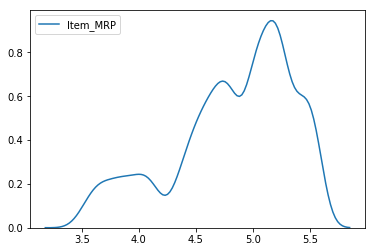

In [1021]:
sns.kdeplot(label_df['Item_MRP'])

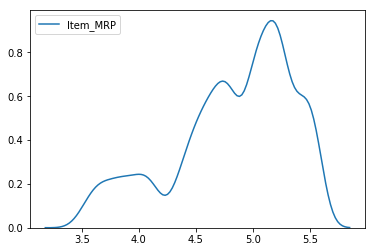

In [1026]:
label_df['Item_MRP']=np.log(label_df['Item_MRP'])
sns.kdeplot(label_df['Item_MRP'])
plt.show()

- Plotting KDE plot of Item_Weight

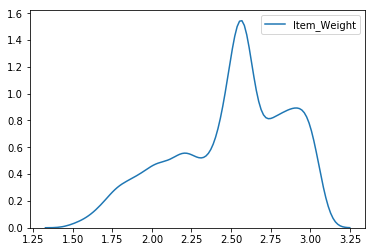

In [1023]:
sns.kdeplot(label_df['Item_Weight'])

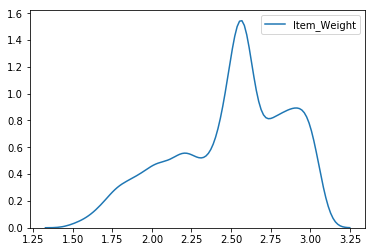

In [1027]:
label_df['Item_Weight']=np.log(label_df['Item_Weight'])
sns.kdeplot(label_df['Item_Weight'])
plt.show()

### Checking Skewness on dataframe onehot_df

In [679]:
onehot_df.skew()

Item_Weight                         0.089537
Item_Visibility                     0.813980
Item_MRP                            0.127202
Outlet_Establishment_Year          -0.396641
Item_Outlet_Sales                   1.177531
Item_Fat_Content_low fat           -0.616705
Item_Fat_Content_regular            0.616705
Item_Type_Baking Goods              3.199792
Item_Type_Breads                    5.567533
Item_Type_Breakfast                 8.632562
Item_Type_Canned                    3.196644
Item_Type_Dairy                     3.096356
Item_Type_Frozen Foods              2.659119
Item_Type_Fruits and Vegetables     2.021988
Item_Type_Hard Drinks               6.071724
Item_Type_Health and Hygiene        3.668801
Item_Type_Household                 2.547106
Item_Type_Meat                      4.136741
Item_Type_Others                    6.889767
Item_Type_Seafood                  11.411629
Item_Type_Snack Foods               2.065882
Item_Type_Soft Drinks               4.026612
Item_Type_

- Applying Log Transformaion to those columns where skewness is high just like we did above.

In [1209]:
onehot_df['Item_Weight']=np.log(onehot_df['Item_Weight'])
onehot_df['Item_MRP']=np.log(onehot_df['Item_MRP'])

# Normalization and Standardization

### First lets apply Normalization on both dataframes i.e. label_df and onehot_df

#### Dataframe as label_df

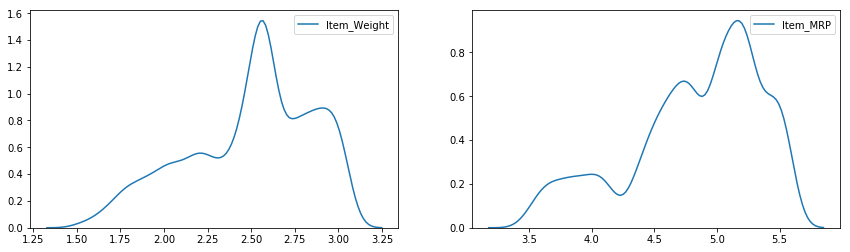

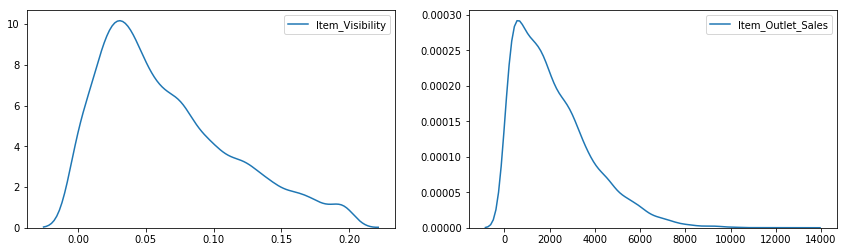

In [1028]:
#plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.kdeplot(label_df['Item_Weight'])

plt.subplot(1,2,2)
sns.kdeplot(label_df['Item_MRP'])
plt.subplots_adjust(right=2)
plt.show()

plt.subplot(1,2,1)
sns.kdeplot(label_df['Item_Visibility'])

plt.subplot(1,2,2)
sns.kdeplot(label_df['Item_Outlet_Sales'])
plt.subplots_adjust(right=2)
plt.show()

In [1029]:
mmsc=MinMaxScaler()
mmsc_data_label=pd.DataFrame(mmsc.fit_transform(label_df))
mmsc_data_label.columns=label_df.columns
mmsc_data_label.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.462051,0.0,0.081883,0.266667,0.969148,0.583333,0.5,0.0,0.333333,0.283587
1,0.169670,1.0,0.098369,0.933333,0.202234,1.000000,0.5,1.0,0.666667,0.031419
2,0.871279,0.0,0.085520,0.666667,0.704368,0.583333,0.5,0.0,0.333333,0.158115
3,0.931292,1.0,0.000000,0.400000,0.821649,0.541667,0.5,1.0,0.000000,0.053555
4,0.435771,0.0,0.000000,0.600000,0.253374,0.083333,0.0,1.0,0.333333,0.073651


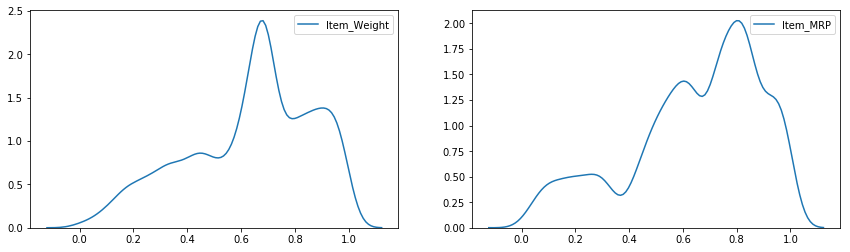

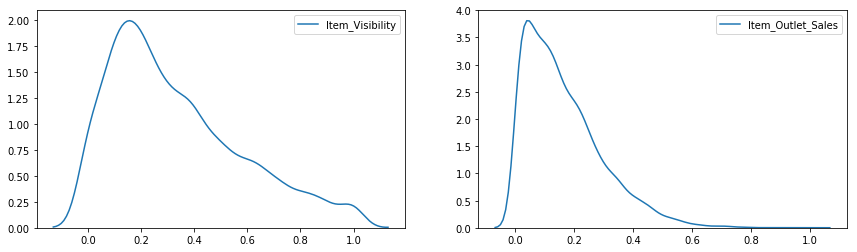

In [683]:
#plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.kdeplot(mmsc_data_label['Item_Weight'])

plt.subplot(1,2,2)
sns.kdeplot(mmsc_data_label['Item_MRP'])
plt.subplots_adjust(right=2)
plt.show()

plt.subplot(1,2,1)
sns.kdeplot(mmsc_data_label['Item_Visibility'])

plt.subplot(1,2,2)
sns.kdeplot(mmsc_data_label['Item_Outlet_Sales'])
plt.subplots_adjust(right=2)
plt.show()

#### Dataframe as onehot_df

In [684]:
mmsc_data_onehot=pd.DataFrame(mmsc.fit_transform(onehot_df))
mmsc_data_onehot.columns=onehot_df.columns
mmsc_data_onehot.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.462051,0.081883,0.969148,0.583333,0.283587,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.169670,0.098369,0.202234,1.000000,0.031419,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.871279,0.085520,0.704368,0.583333,0.158115,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.931292,0.000000,0.821649,0.541667,0.053555,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.435771,0.000000,0.253374,0.083333,0.073651,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Now lets apply Standardization on both dataframes i.e. label_df and onehot_df

#### Dataframe as label_df

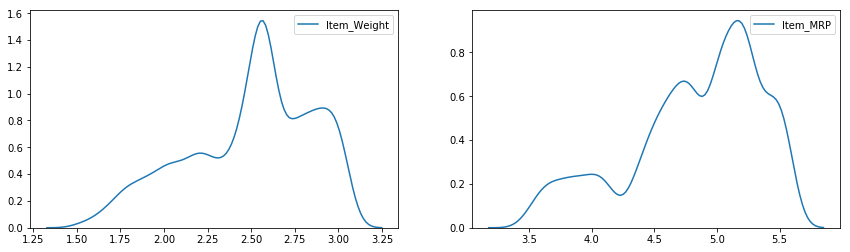

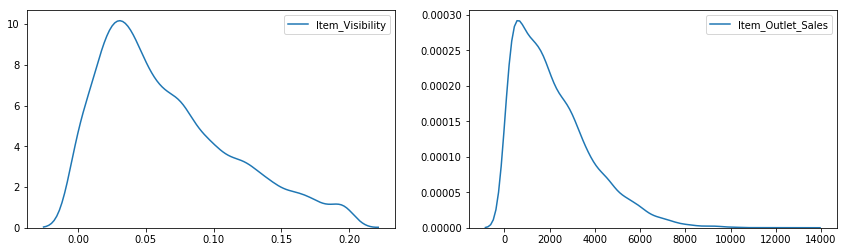

In [685]:
#plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.kdeplot(label_df['Item_Weight'])

plt.subplot(1,2,2)
sns.kdeplot(label_df['Item_MRP'])
plt.subplots_adjust(right=2)
plt.show()

plt.subplot(1,2,1)
sns.kdeplot(label_df['Item_Visibility'])

plt.subplot(1,2,2)
sns.kdeplot(label_df['Item_Outlet_Sales'])
plt.subplots_adjust(right=2)
plt.show()

In [1030]:
sc=StandardScaler()
sc_data_label=sc.fit_transform(label_df)
sc_data_label=pd.DataFrame(sc_data_label)
sc_data_label.columns=label_df.columns
sc_data_label.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.732457,-0.738147,-1.008628,-0.766479,1.316404,0.139541,-0.284581,-1.369334,-0.252658,0.910601
1,-1.987752,1.354743,-0.942473,1.608963,-1.808494,1.334103,-0.284581,1.091569,1.002972,-1.018440
2,1.024504,-0.738147,-0.994034,0.658786,0.237521,0.139541,-0.284581,-1.369334,-0.252658,-0.049238
3,1.282160,1.354743,-1.337208,-0.291391,0.715398,0.020085,-0.284581,1.091569,-1.508289,-0.849103
4,-0.845286,-0.738147,-1.337208,0.421242,-1.600117,-1.293934,-1.950437,1.091569,-0.252658,-0.695373


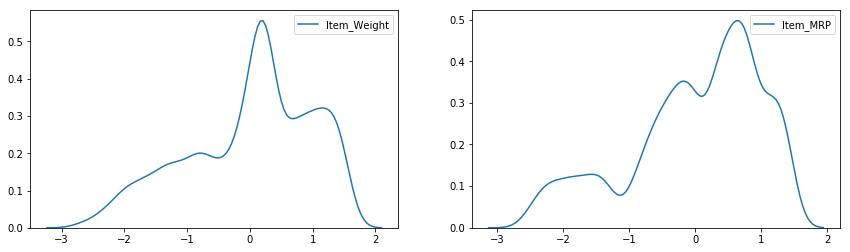

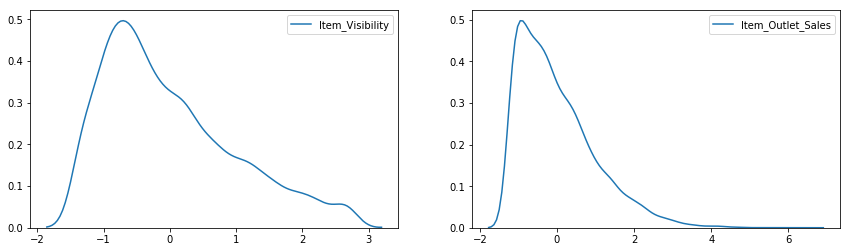

In [687]:
#plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.kdeplot(sc_data_label['Item_Weight'])

plt.subplot(1,2,2)
sns.kdeplot(sc_data_label['Item_MRP'])
plt.subplots_adjust(right=2)
plt.show()

plt.subplot(1,2,1)
sns.kdeplot(sc_data_label['Item_Visibility'])

plt.subplot(1,2,2)
sns.kdeplot(sc_data_label['Item_Outlet_Sales'])
plt.subplots_adjust(right=2)
plt.show()

#### Dataframe as onehot_df

In [688]:
sc_data_onehot=sc.fit_transform(onehot_df)
sc_data_onehot=pd.DataFrame(sc_data_onehot)
sc_data_onehot.columns=onehot_df.columns
sc_data_onehot.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.732457,-1.008628,1.316404,0.139541,0.910601,0.738147,-0.738147,-0.286855,-0.174193,-0.114346,...,-0.350395,0.798807,-0.623893,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028
1,-1.987752,-0.942473,-1.808494,1.334103,-1.018440,-1.354743,1.354743,-0.286855,-0.174193,-0.114346,...,-0.350395,0.798807,-0.623893,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028
2,1.024504,-0.994034,0.237521,0.139541,-0.049238,0.738147,-0.738147,-0.286855,-0.174193,-0.114346,...,-0.350395,0.798807,-0.623893,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028
3,1.282160,-1.337208,0.715398,0.020085,-0.849103,-1.354743,1.354743,-0.286855,-0.174193,-0.114346,...,-0.350395,0.798807,-0.623893,-0.623893,-0.696678,1.242650,2.621031,-1.375891,-0.349551,-0.351028
4,-0.845286,-1.337208,-1.600117,-1.293934,-0.695373,0.738147,-0.738147,-0.286855,-0.174193,-0.114346,...,2.853918,-1.251866,-0.623893,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028


#### We have applied both normalization and standardization to our dataframes and created two new dataframes each. So our model is going to tell which method is best for this data. 

In [689]:
mmsc_data_label.shape

(8523, 10)

In [690]:
mmsc_data_onehot.shape

(8523, 33)

In [691]:
sc_data_label.shape

(8523, 10)

In [692]:
mmsc_data_onehot.shape

(8523, 33)

- We have four dataframes that can be used for model building and evaluation i.e. mmsc_data_label,mmsc_data_onehot,sc_data_label and sc_data_onehot.

# Modelling Type 1(Linear Regression): Splitting data and Fitting Model with prediction

## Dataframe as mmsc_data_label

In [1036]:
X=mmsc_data_label.iloc[:,:9]
Y=mmsc_data_label.loc[:,'Item_Outlet_Sales']

In [1037]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

- Creating LinearRegression object and fitting it to the data

In [1038]:
# Creating object with LinearRegression and fitting the same to training data
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

- Predicting

In [1039]:
# Predicting
prediction=reg.predict(x_test)

- RMSE and R2 Score

In [1040]:
#Lets see the RMSE and R2.
rmse = np.sqrt(mean_squared_error(y_test,prediction))
r2 = r2_score(y_test,prediction)     
print("RMSE = ",rmse)
print("R2 score = ",r2)

RMSE =  0.09022727979632492
R2 score =  0.5069379812734451


## Dataframe as mmsc_data_onehot

In [1041]:
X=mmsc_data_onehot.drop(['Item_Outlet_Sales'],axis=1)
Y=mmsc_data_onehot.loc[:,'Item_Outlet_Sales']

In [1042]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

In [1043]:
print(x_train.shape)
print(y_train.shape)

(7244, 32)
(7244,)


- Creating LinearRegression object and fitting it to the data

In [1044]:
# Creating object with LinearRegression and fitting the same to training data
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

- Predicting

In [1045]:
# Predicting
prediction=reg.predict(x_test)

- RMSE and R2 Score

In [1046]:
#Lets see the RMSE and R2.
rmse = np.sqrt(mean_squared_error(y_test,prediction))
r2 = r2_score(y_test,prediction)     
print("RMSE = ",rmse)
print("R2 score = ",r2)

RMSE =  0.08565618988802633
R2 score =  0.5556314383118908


## Dataframe as sc_data_label

In [1047]:
X=sc_data_label.iloc[:,:9]
Y=sc_data_label.loc[:,'Item_Outlet_Sales']

In [1048]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

- Creating LinearRegression object and fitting it to the data

In [1049]:
# Creating object with LinearRegression and fitting the same to training data
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

- Predicting

In [1050]:
prediction=reg.predict(x_test)

- RMSE and R2 Score

In [1051]:
#Lets see the accuracy,RMSE and R2.
rmse = np.sqrt(mean_squared_error(y_test,prediction))
r2 = r2_score(y_test,prediction)     
print("RMSE = ",rmse)
print("R2 score = ",r2)

RMSE =  0.6902238119581501
R2 score =  0.5069379812734449


## Dataframe as sc_data_onehot

In [1052]:
X=sc_data_onehot.drop(['Item_Outlet_Sales'],axis=1)
Y=sc_data_onehot.loc[:,'Item_Outlet_Sales']

In [1053]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

- Creating LinearRegression object and fitting it to the data

In [1054]:
# Creating object with LinearRegression and fitting the same to training data
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

- Predicting

In [1055]:
# Predicting
prediction=reg.predict(x_test)

- RMSE and R2 Score

In [1056]:
#Lets see the RMSE and R2 score
rmse = np.sqrt(mean_squared_error(y_test,prediction))
r2 = r2_score(y_test,prediction)     
print("RMSE = ",rmse)
print("R2 score = ",r2)

RMSE =  0.6552602353494688
R2 score =  0.5556253247866583


From above we can observe that "OneHotEncoder" is a better option for this dataset as we have got good results for both dataframe mmsc_data_onehot and sc_data_onehot.
Therefore we wil be proceeding with dataframes mmsc_data_onehot and sc_data_onehot.

# Modelling Type 2 (Ridge Regression): Splitting data and Fitting Model with prediction

### Dataframe as mmsc_data_onehot

In [1057]:
X=mmsc_data_onehot.drop(['Item_Outlet_Sales'],axis=1)
Y=mmsc_data_onehot.loc[:,'Item_Outlet_Sales']

In [1058]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

In [1059]:
ridgeReg = Ridge(alpha=0.05)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

print('RMSE is ',rmse, 'and','R2 is ',r2)

RMSE is  0.08565657784335999 and R2 is  0.5556274130209164


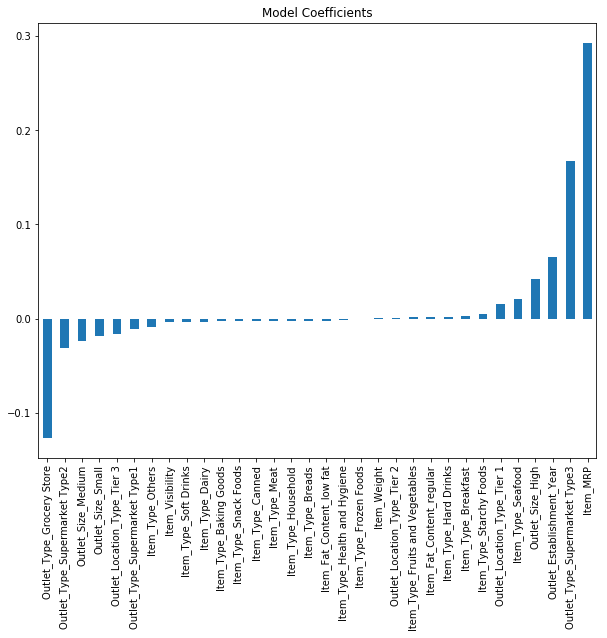

In [1061]:
predictors=x_train.columns
coef=pd.Series(ridgeReg.coef_,predictors).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind='bar',title='Model Coefficients')
plt.show()

From above graph we can analyze that few columns have major impact on the model.

### Dataframe as sc_data_onehot

In [1062]:
X=sc_data_onehot.drop(['Item_Outlet_Sales'],axis=1)
Y=sc_data_onehot.loc[:,'Item_Outlet_Sales']

In [1063]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

In [1064]:
ridgeReg = Ridge(alpha=0.05)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

print('RMSE is ',rmse, 'and','R2 is ',r2)

RMSE is  0.655256199466311 and R2 is  0.5556307987606539


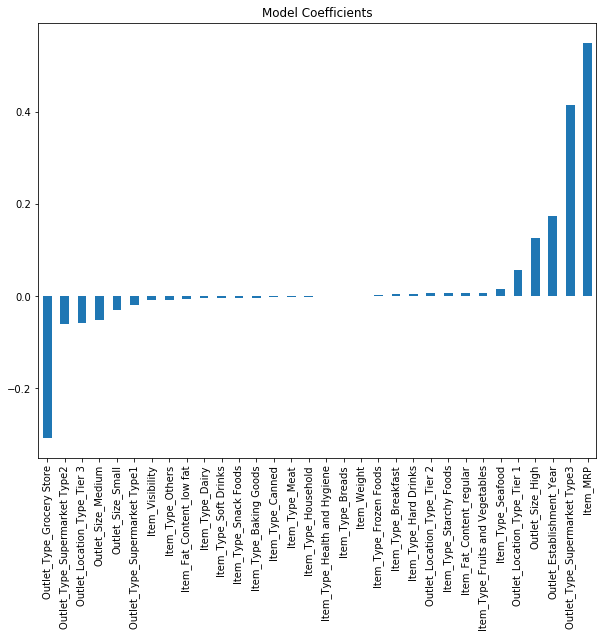

In [1066]:
predictors=x_train.columns
coef=pd.Series(ridgeReg.coef_,predictors).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind='bar',title='Model Coefficients')
plt.show()

From above graph we can analyze that few columns have major impact on the model.

# Modelling Type 3 (Lasso Regression): Splitting data and Fitting Model with prediction

### Dataframe as mmsc_data_onehot

In [1071]:
X=mmsc_data_onehot.drop(['Item_Outlet_Sales'],axis=1)
Y=mmsc_data_onehot.loc[:,'Item_Outlet_Sales']

In [1072]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

In [1074]:
lassoReg = Lasso(alpha=0.01)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

print('RMSE is ',rmse,'R2 is ',r2)

RMSE is  0.10327726026136988 R2 is  0.35399595437838394


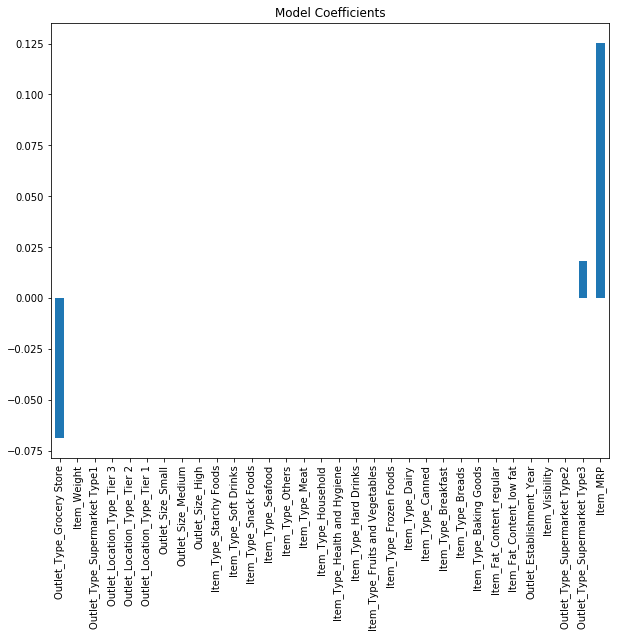

In [1076]:
predictors=x_train.columns
coef=pd.Series(lassoReg.coef_,predictors).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind='bar',title='Model Coefficients')
plt.show()

### Dataframe as sc_data_onehot

In [1077]:
X=sc_data_onehot.drop(['Item_Outlet_Sales'],axis=1)
Y=sc_data_onehot.loc[:,'Item_Outlet_Sales']

In [1078]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

In [1079]:
lassoReg = Lasso(alpha=0.01)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

print('RMSE is ',rmse,'R2 is ',r2)

RMSE is  0.6547859974924063 R2 is  0.5562683152266178


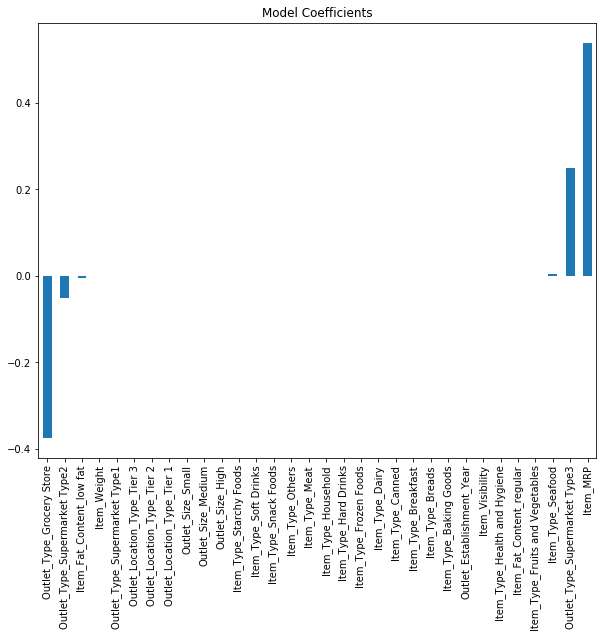

In [1080]:
predictors=x_train.columns
coef=pd.Series(lassoReg.coef_,predictors).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind='bar',title='Model Coefficients')
plt.show()

#### We have built models by different techniques and from them we can analyze few features that have major impact on the dependent variable, so for that lets do some extraction of variables.

# Extracting different features to see their impact on the dependent variable
- Note : We are extracting features based on above results where Ridge and Lasso graphs are clearly indicating the variables with most of the impact.

### Extraction 1 :

In [1081]:
new_df=onehot_df[['Outlet_Type_Supermarket Type3','Outlet_Establishment_Year','Item_Outlet_Sales']]

In [1083]:
X=new_df.drop(['Item_Outlet_Sales'],axis=1)
Y=onehot_df.loc[:,'Item_Outlet_Sales']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

lassoReg = Lasso(alpha=0.03,normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

print('RMSE is ',rmse,'R2 is ',r2)

RMSE is  1561.0691357123412 R2 is  0.13382724885134356


### Extraction 2 :

In [1085]:
new_df=onehot_df[['Outlet_Establishment_Year','Item_MRP','Item_Outlet_Sales']]

In [1086]:
X=new_df.drop(['Item_Outlet_Sales'],axis=1)
Y=onehot_df.loc[:,'Item_Outlet_Sales']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

lassoReg = Lasso(alpha=0.03,normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

print('RMSE is ',rmse,'R2 is ',r2)

RMSE is  1388.376897893851 R2 is  0.31486682083788553


### Extraction 3 :

In [1087]:
new_df=onehot_df[['Outlet_Type_Supermarket Type3','Outlet_Establishment_Year','Item_MRP','Item_Outlet_Sales']]

In [1088]:
X=new_df.drop(['Item_Outlet_Sales'],axis=1)
Y=onehot_df.loc[:,'Item_Outlet_Sales']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

lassoReg = Lasso(alpha=0.03,normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

print('RMSE is ',rmse,'R2 is ',r2)

RMSE is  1251.7815604501181 R2 is  0.4430485457099853


### Extraction 4 :

In [1089]:
new_df=onehot_df[['Outlet_Type_Grocery Store','Item_Outlet_Sales']]

In [1090]:
X=new_df.drop(['Item_Outlet_Sales'],axis=1)
Y=onehot_df.loc[:,'Item_Outlet_Sales']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

lassoReg = Lasso(alpha=0.03,normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

print('RMSE is ',rmse,'R2 is ',r2)

RMSE is  1524.211340988183 R2 is  0.17424612563863595


### Extraction 5 :

In [1091]:
new_df=onehot_df[['Outlet_Type_Grocery Store','Outlet_Type_Supermarket Type3','Outlet_Establishment_Year','Item_MRP','Item_Outlet_Sales']]

In [1092]:
X=new_df.drop(['Item_Outlet_Sales'],axis=1)
Y=onehot_df.loc[:,'Item_Outlet_Sales']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

lassoReg = Lasso(alpha=0.03,normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

print('RMSE is ',rmse,'R2 is ',r2)

RMSE is  1121.3441799082614 R2 is  0.5530714389519887


Few features that are majorly impacting the Item_Outlet_Sales are :
- 'Outlet_Type_Grocery Store'
- 'Outlet_Type_Supermarket Type3'
- 'Outlet_Establishment_Year'
- 'Item_MRP'

# Lets do some analysis of these variables and extrct the model summary.

### Lets get summary of the features that we have taken with the help of OLS Summary.

- DataFrame as mmsc_data_onehot

In [1135]:
from statsmodels.api import OLS
X=mmsc_data_onehot[['Item_MRP','Item_Fat_Content_regular','Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1','Outlet_Establishment_Year', 'Outlet_Type_Supermarket Type2','Outlet_Type_Supermarket Type3']]
Y=mmsc_data_onehot.loc[:,'Item_Outlet_Sales']
OLS(Y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     1671.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:53:20   Log-Likelihood:                 8563.4
No. Observations:                8523   AIC:                        -1.711e+04
Df Residuals:                    8516   BIC:                        -1.706e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_MRP                          0.2921      0.004     74.669      0.000       0.284       0.300
Item_Fat_Content_regular          0.0037      0.002      1.817      0.069      -0.000       0.008
Outlet_Type_Grocery Store        -0.1671      0.004    -42.684      0.000      -0.175      -0.159
Outlet_Type_Supermarket Type1    -0.0184      0.004     -4.878      0.000      -0.026      -0.011
Outlet_Establishment_Year         0.0050      0.004      1.229      0.219      -0.003       0.013
Outlet_Type_Supermarket Type2    -0.0453      0.006     -8.017      0.000      -0.056      -0.034
Outlet_Type_Supermarket Type3     0.0917      0.004     23.537      0.000       0.084       0.099
==============================================================================
Omnibus:                     1325.364   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3182.695
Skew:                           0.886   Prob(JB):                         0.00
Kurtosis:                       5.413   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- DataFrame as sc_data_onehot

In [1114]:
from statsmodels.api import OLS
X=sc_data_onehot[['Item_MRP','Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2','Outlet_Type_Supermarket Type3']]
Y=sc_data_onehot.loc[:,'Item_Outlet_Sales']
OLS(Y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     2504.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:24:36   Log-Likelihood:                -8780.6
No. Observations:                8523   AIC:                         1.757e+04
Df Residuals:                    8519   BIC:                         1.760e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_MRP                          0.5485      0.007     74.676      0.000       0.534       0.563
Outlet_Type_Grocery Store        -0.3418      0.006    -57.915      0.000      -0.353      -0.330
Outlet_Type_Supermarket Type1     0.0591      0.004     13.995      0.000       0.051       0.067
Outlet_Type_Supermarket Type2    -0.0206      0.006     -3.391      0.001      -0.033      -0.009
Outlet_Type_Supermarket Type3     0.2949      0.006     48.552      0.000       0.283       0.307
==============================================================================
Omnibus:                     1323.741   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3175.432
Skew:                           0.885   Prob(JB):                         0.00
Kurtosis:                       5.410   Cond. No.                     6.41e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.61e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From above we can analyze that there is multicollinearity present in these features,so lets plot heatmap to check correlation among variables. 

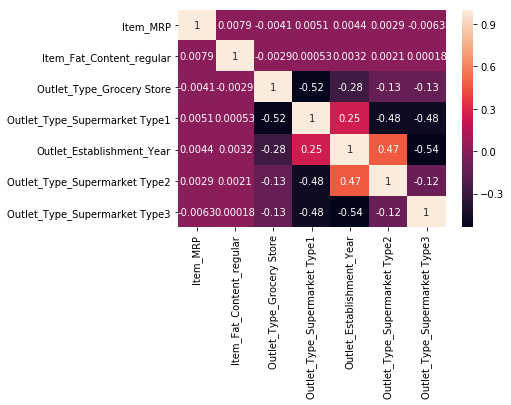

In [1136]:
sns.heatmap(X.corr(),annot=True)

Above heatmap gives us an illusion that Outlet_type_Supermarket are highly correlated with each other, so lets drop two of them and keep one in our model.

- Dataframe as mmsc_data_onehot

In [1134]:
from statsmodels.api import OLS
X=mmsc_data_onehot[['Item_MRP','Outlet_Establishment_Year','Item_Fat_Content_regular','Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type3']]
Y=mmsc_data_onehot.loc[:,'Item_Outlet_Sales']
OLS(Y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     7804.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:52:53   Log-Likelihood:                 8528.7
No. Observations:                8523   AIC:                        -1.705e+04
Df Residuals:                    8518   BIC:                        -1.701e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_MRP                          0.2828      0.003     98.719      0.000       0.277       0.288
Outlet_Establishment_Year        -0.0173      0.003     -6.199      0.000      -0.023      -0.012
Item_Fat_Content_regular          0.0024      0.002      1.188      0.235      -0.002       0.006
Outlet_Type_Grocery Store        -0.1545      0.003    -51.716      0.000      -0.160      -0.149
Outlet_Type_Supermarket Type3     0.0982      0.003     28.511      0.000       0.091       0.105
==============================================================================
Omnibus:                     1409.998   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3455.303
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                       5.505   Cond. No.                         4.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If we observe carefully then we can see that R-square has imroved alot after dropping those columns that were dependent on each other.

- Dataframe as sc_data_onehot

In [1133]:
from statsmodels.api import OLS
X=sc_data_onehot[['Item_MRP','Item_Fat_Content_regular','Outlet_Establishment_Year','Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type3']]
Y=sc_data_onehot.loc[:,'Item_Outlet_Sales']
OLS(Y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1980.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:52:20   Log-Likelihood:                -8807.0
No. Observations:                8523   AIC:                         1.762e+04
Df Residuals:                    8518   BIC:                         1.766e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_MRP                          0.5483      0.007     74.411      0.000       0.534       0.563
Item_Fat_Content_regular          0.0133      0.007      1.808      0.071      -0.001       0.028
Outlet_Establishment_Year        -0.0248      0.010     -2.567      0.010      -0.044      -0.006
Outlet_Type_Grocery Store        -0.3829      0.008    -46.672      0.000      -0.399      -0.367
Outlet_Type_Supermarket Type3     0.2500      0.009     26.763      0.000       0.232       0.268
==============================================================================
Omnibus:                     1327.426   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3179.973
Skew:                           0.888   Prob(JB):                         0.00
Kurtosis:                       5.409   Cond. No.                         2.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From above we can analyze that R-square is quite high for mmsc_data_onehot as compared to sc_data_onehot,  therefore we will take the same for final model building.

## Linear Regression Model

In [1144]:
X=mmsc_data_onehot[['Item_MRP','Outlet_Type_Grocery Store','Item_Fat_Content_regular','Outlet_Establishment_Year',
       'Outlet_Type_Supermarket Type3']]
Y=mmsc_data_onehot.loc[:,'Item_Outlet_Sales']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=3)


reg=LinearRegression()
reg.fit(x_train,y_train)
pred = reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

print('RMSE is ',rmse, 'and','R2 is ',r2)

RMSE is  0.08654122054637839 and R2 is  0.5722261949879537


- Plotting the Model coefficients

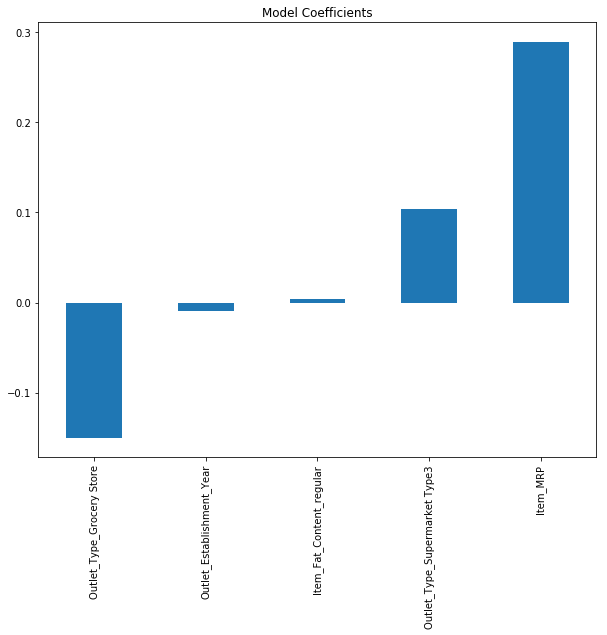

In [1142]:
predictors=x_train.columns
coef=pd.Series(reg.coef_,predictors).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind='bar',title='Model Coefficients')
plt.show()

## Ridge Regression Model

In [1143]:
X=mmsc_data_onehot[['Item_MRP','Outlet_Type_Grocery Store','Item_Fat_Content_regular','Outlet_Establishment_Year',
       'Outlet_Type_Supermarket Type3']]
Y=mmsc_data_onehot.loc[:,'Item_Outlet_Sales']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=3)

ridgeReg = Ridge(alpha=0.05)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

print('RMSE is ',rmse, 'and','R2 is ',r2)

RMSE is  0.08654171951563819 and R2 is  0.5722212621572673


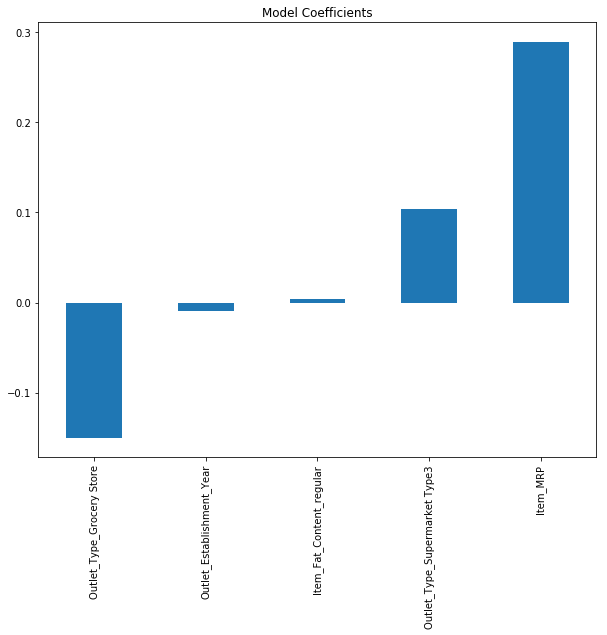

In [1146]:
predictors=x_train.columns
coef=pd.Series(ridgeReg.coef_,predictors).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind='bar',title='Model Coefficients')
plt.show()

## Lasso Regression Model

In [1153]:
X=sc_data_onehot[['Item_MRP','Outlet_Type_Grocery Store','Item_Fat_Content_regular','Outlet_Establishment_Year',
       'Outlet_Type_Supermarket Type3']]
Y=sc_data_onehot.loc[:,'Item_Outlet_Sales']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=3)

lassoReg = Lasso(alpha=0.01)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

print('RMSE is ',rmse,'R2 is ',r2)

RMSE is  0.6629766157885101 R2 is  0.5709969020306542


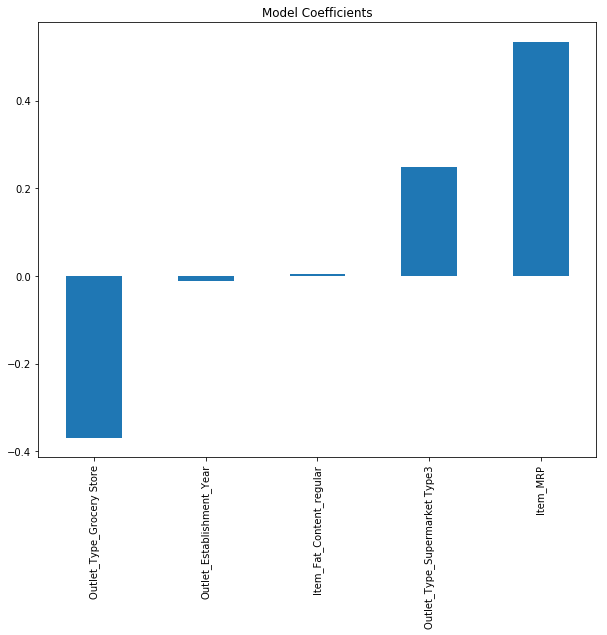

In [1154]:
predictors=x_train.columns
coef=pd.Series(lassoReg.coef_,predictors).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind='bar',title='Model Coefficients')
plt.show()

Therefore our final interpretation is that Linear Model and Ridge Model are performing well on mmsc_data_onehot while Lasso Model is performing well on sc_data_onehot.

### We will be taking Linear Regression Model only for our prediction with the help of OneHotEncoding and Normalization.

# Final Prediction on test data

In [1155]:
test = pd.read_csv('C:/Users/Administrator/Desktop/Python/ML/Assignments/Assign1/Assignment1_PGD B7/Assignment1_PGD B7/Test.csv')

In [1157]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [1158]:
## Lets drop the columns that we don't require
test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [1160]:
# As we can observe that "Item_Fat_Content" is having same values with unique names,therefor equalizing lower and equalizing values that are similar.
test['Item_Fat_Content']=test['Item_Fat_Content'].str.lower()
test['Item_Fat_Content']=test['Item_Fat_Content'].replace('lf','low fat').replace('reg','regular')
test['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

# Missing Value Treatment

- Treating Item_weight

In [1162]:
mean_weight=test.groupby('Item_Type')['Item_Weight'].mean().reset_index()
mean_weight

,Item_Type,Item_Weight
0,Baking Goods,12.272418
1,Breads,10.866799
2,Breakfast,13.759603
3,Canned,12.393565
4,Dairy,12.955040
5,Frozen Foods,12.101543
6,Fruits and Vegetables,13.146659
7,Hard Drinks,11.844417
8,Health and Hygiene,13.216929
9,Household,13.270504


In [1163]:
# Now as we have found the mean of different item type,the next task is to impute the same for missing values in our data
a=test[test['Item_Weight'].isnull()]

a[a['Item_Type']=="Baking Goods"]=a[a['Item_Type']=="Baking Goods"].fillna(mean_weight['Item_Weight'][0])
a[a['Item_Type']=="Breads"]=a[a['Item_Type']=="Breads"].fillna(mean_weight['Item_Weight'][1])
a[a['Item_Type']=="Breakfast"]=a[a['Item_Type']=="Breakfast"].fillna(mean_weight['Item_Weight'][2])
a[a['Item_Type']=="Canned"]=a[a['Item_Type']=="Canned"].fillna(mean_weight['Item_Weight'][3])
a[a['Item_Type']=="Dairy"]=a[a['Item_Type']=="Dairy"].fillna(mean_weight['Item_Weight'][4])
a[a['Item_Type']=="Frozen Foods"]=a[a['Item_Type']=="Frozen Foods"].fillna(mean_weight['Item_Weight'][5])
a[a['Item_Type']=="Fruits and Vegetables"]=a[a['Item_Type']=="Fruits and Vegetables"].fillna(mean_weight['Item_Weight'][6])
a[a['Item_Type']=="Hard Drinks"]=a[a['Item_Type']=="Hard Drinks"].fillna(mean_weight['Item_Weight'][7])
a[a['Item_Type']=="Health and Hygiene"]=a[a['Item_Type']=="Health and Hygiene"].fillna(mean_weight['Item_Weight'][8])
a[a['Item_Type']=="Household"]=a[a['Item_Type']=="Household"].fillna(mean_weight['Item_Weight'][9])
a[a['Item_Type']=="Meat"]=a[a['Item_Type']=="Meat"].fillna(mean_weight['Item_Weight'][10])
a[a['Item_Type']=="Others"]=a[a['Item_Type']=="Others"].fillna(mean_weight['Item_Weight'][11])
a[a['Item_Type']=="Seafood"]=a[a['Item_Type']=="Seafood"].fillna(mean_weight['Item_Weight'][12])
a[a['Item_Type']=="Snack Foods"]=a[a['Item_Type']=="Snack Foods"].fillna(mean_weight['Item_Weight'][13])
a[a['Item_Type']=="Soft Drinks"]=a[a['Item_Type']=="Soft Drinks"].fillna(mean_weight['Item_Weight'][14])
a[a['Item_Type']=="Starchy Foods"]=a[a['Item_Type']=="Starchy Foods"].fillna(mean_weight['Item_Weight'][15])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [1164]:
# Imputing the nan values with the mean
test['Item_Weight']=test['Item_Weight'].fillna(a['Item_Weight'])

- Treating Outlet_Size

In [1165]:
mode_outlet=sts.mode(test['Outlet_Size'])
test['Outlet_Size']=test['Outlet_Size'].fillna(mode_outlet)

In [1166]:
test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Treating Outliers

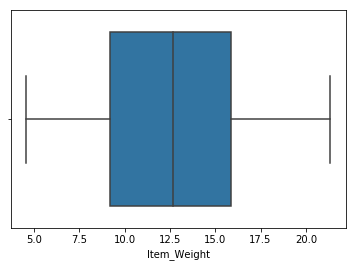

In [1167]:
sns.boxplot(test['Item_Weight'])

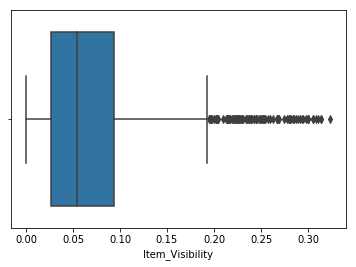

In [1168]:
sns.boxplot(test['Item_Visibility'])

- Treating Item_Visibility as there are many outliers present in there

In [1169]:
Q1 = np.quantile(test['Item_Visibility'],0.25)
Q3 = np.quantile(test['Item_Visibility'],0.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)

#Values that are outliers provided we have initialised head in the same to just have a look at them.
test[(test['Item_Visibility']>upper_limit)\
| (test['Item_Visibility']<lower_limit)].head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
19,13.600000,low fat,0.196898,Snack Foods,193.7136,1998,Medium,Tier 3,Grocery Store
46,11.650000,low fat,0.291322,Dairy,55.8298,1998,Medium,Tier 3,Grocery Store
76,12.684256,low fat,0.299544,Snack Foods,124.8704,1985,Small,Tier 1,Grocery Store
78,11.844417,low fat,0.246178,Hard Drinks,252.4382,1985,Small,Tier 1,Grocery Store
89,17.750000,regular,0.262504,Dairy,242.2538,1998,Medium,Tier 3,Grocery Store


In [1170]:
# Capping and Flooring all values of Item Visibility that are our outliers.
test['Item_Visibility'] = test['Item_Visibility'].clip_upper(upper_limit)
test['Item_Visibility'] = test['Item_Visibility'].clip_lower(lower_limit)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


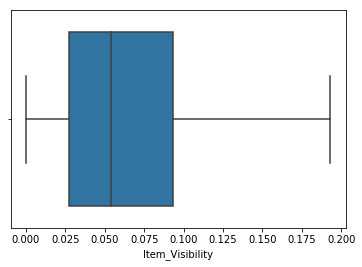

In [1172]:
sns.boxplot(test['Item_Visibility'])

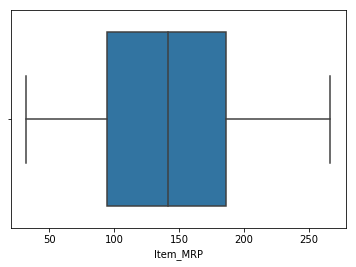

In [1175]:
sns.boxplot(test['Item_MRP'])

# Treating Categoricl variables with help of OneHotEncoding

In [1177]:
test = pd.get_dummies(test)

Lets keep only those variables that are necessary for our model to predict

In [1178]:
onehot_df=test[['Item_MRP','Outlet_Type_Grocery Store','Item_Fat_Content_regular','Outlet_Establishment_Year',
       'Outlet_Type_Supermarket Type3']]

# Transformation

In [1181]:
onehot_df.skew()

Item_MRP                         0.136182
Outlet_Type_Grocery Store        2.239791
Item_Fat_Content_regular         0.609223
Outlet_Establishment_Year       -0.396306
Outlet_Type_Supermarket Type3    2.496167
dtype: float64

- Treating Item_MRP with help of log transformation as there is skewness.

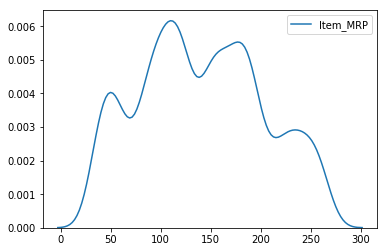

In [1182]:
sns.kdeplot(onehot_df['Item_MRP'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


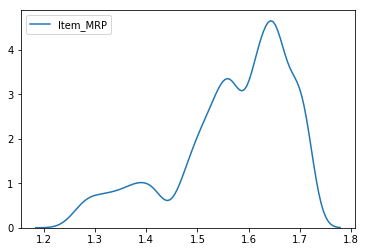

In [1186]:
onehot_df['Item_MRP']=np.log(onehot_df['Item_MRP'])
sns.kdeplot(onehot_df['Item_MRP'])
plt.show()

We have followed every step the next thing is to take all the columns as independent variables that will help us in predicting 'Item_Outlet_Sales'.

In [1194]:
# Creating Final dataframe
Final_DataFrame=mmsc_data_onehot.copy()

### Predicting without implementing Normalization

In [1216]:
X=onehot_df[['Item_MRP','Outlet_Type_Grocery Store','Item_Fat_Content_regular','Outlet_Establishment_Year',
       'Outlet_Type_Supermarket Type3']]
Y=onehot_df['Item_Outlet_Sales']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.15,random_state=3)
reg=LinearRegression()
reg.fit(x_train,y_train)
pred=reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

print('RMSE is ',rmse, 'and','R2 is ',r2)

RMSE is  1129.6809498075017 and R2 is  0.5722261949879539


Text(0.5, 1.0, 'Residual plot')

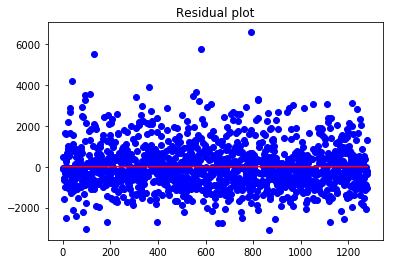

In [1224]:
#Resuidual plot
x = [i for i in range(1,len(pred)+1)]

x_plot = plt.scatter(x,(y_test-pred),c='b')
plt.plot(x,[0]*len(pred),c='r')
plt.title('Residual plot')

- We can observe that even without normalization also we are getting the same results with very less difference, therefore we will be applying the same model on our final test data.

## Dependent variables

In [1218]:
X=test[['Item_MRP','Outlet_Type_Grocery Store','Item_Fat_Content_regular','Outlet_Establishment_Year',
       'Outlet_Type_Supermarket Type3']]

# Final Prediction

In [1219]:
Final_DataFrame['Item_Outlet_Sales']=reg.predict(X)

In [1223]:
Final_DataFrame

,Item_MRP,Outlet_Type_Grocery Store,Item_Fat_Content_regular,Outlet_Establishment_Year,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,0.629788,0.0,0.0,0.583333,0.0,183655.935936
1,0.533037,0.0,1.0,0.916667,0.0,147497.006130
2,0.963003,1.0,0.0,0.541667,0.0,417432.596821
3,0.786160,0.0,0.0,0.916667,0.0,266664.683923
4,0.950900,0.0,1.0,0.000000,1.0,407621.185205
5,0.666429,0.0,1.0,0.500000,0.0,200066.871255
6,0.255035,0.0,1.0,1.000000,0.0,81963.431078
7,0.497875,0.0,0.0,0.000000,1.0,137899.180718
8,0.575762,0.0,1.0,0.708333,0.0,162354.073339
9,0.862378,0.0,0.0,0.916667,0.0,322754.518243


# Important Note ----->>>>>>
We have only used Five variables for prediction that are
- 'Item_MRP'
- 'Outlet_Type_Grocery Store'
- 'Item_Fat_Content_regular'
- 'Outlet_Establishment_Year'
- 'Outlet_Type_Supermarket Type3'
These are the features that have approximately 56% impact on 'Item_Outlet_Sales' and can actually predict 56% variation in the dependent variable.

# --------------THANK YOU--------------